# Unsupervised Machine Learning with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Objectives

* Learn what is unsupervised machine learning

* Group data with clustering

* Find underlying linear patterns with PCA

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Clustering

A series of techniques for finding clusters within datasets.

Clusters are groups of points that are closer to each other than to the rest.

<img src="figs/clustering.png" alt="Clustering" style="height: 600px; float: left;"/>


# Generate random data

We're going to generate random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_classification(n_samples = 300,
                                    n_features = 2,
                                    n_redundant = 0,
                                    n_classes = 3,
                                    n_clusters_per_class = 1,
                                    random_state = 80)
#del(y)

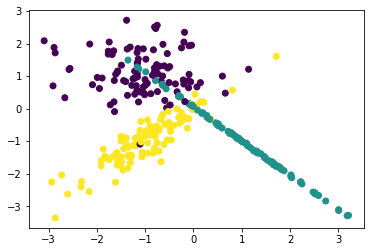

In [5]:
plt.scatter(X[:,0], X[:,1], c = y)

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

## K-means clustering

Very simple algorithm, quite fast:

- Throw K candidate cluster centers (_centroids_) randomly at the data.

- Assign points to the closest centroid.

- Update the centroid as the average of its observations.

- Repeat 2,3 until convergence.



```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    # or select K random points from data
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

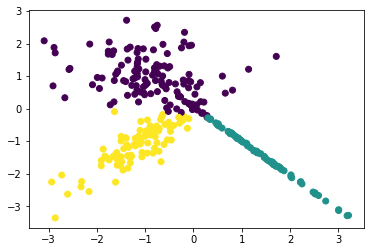

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)#segun el numero que ponga me separara en mas clases o menos(mas o menos colores)

kmeans.fit(X)# como no es supervisado solo le paso X
kmeans.predict(X)


plt.scatter(X[:,0],X[:,1],c = kmeans.predict(X))

#### Exercise

For 3 random starting points, calculate which is the closest for each of our points. 

Hint: check the `scipy.spatial.distance` module. `np.argmin` might also be useful.

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

Notice that class labels (kmeans) may not agree with original class number.

Now let's take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

### Practical: K-Means Clustering with sklearn

Download `players_20.csv` from [here](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv).

In [15]:
players = pd.read_csv('/home/dsc/data/fifa/players_20.csv')
players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [17]:
pd.options.display.max_columns = None
players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

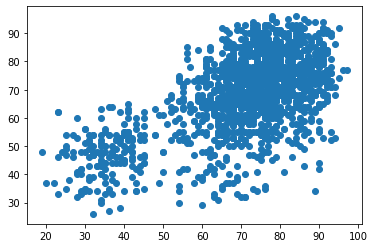

In [18]:
players = players[players['overall'] > 75]

plt.scatter(players['power_stamina'], players['movement_sprint_speed'])

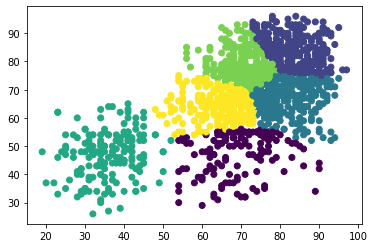

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(players[['power_stamina','movement_sprint_speed']])
clusters = kmeans.predict(players[['power_stamina','movement_sprint_speed']])

plt.scatter(players['power_stamina'], players['movement_sprint_speed'], c=clusters)

In [21]:
from scipy.spatial.distance import cdist

points = players[['power_stamina','movement_sprint_speed']].values
kmeans.cluster_centers_

distances = cdist(points, kmeans.cluster_centers_)
distances.shape

(1615, 6)

In [22]:
distances[:3, :]

array([[36.93483545,  8.11788778, 18.01214103, 53.68528386,  6.96806117,
        21.64236101],
       [46.21262519,  7.40863479, 24.08004678, 65.78416702, 18.8197442 ,
        32.96640863],
       [43.09360489,  5.58184402, 21.82181272, 61.48191526, 14.59389045,
        29.01192496]])

### Ejercicio

Calculate the average distance to the assigned cluster.

In [26]:
distancias = 0
for n in range(len(distances)):
    distancias = distancias + np.min(distances[n])
print(distancias/len(distances))

7.210929493928147


In [27]:
#By Dani
np.mean(np.min(distances, axis = 1))

7.210929493928126

## The elbow method

To choose a number of clusters in KMeans

In [28]:
# The bad one

clusterings = []
scores = []

for n_clusters in range(1, 11):
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(players[['power_stamina','movement_sprint_speed']])
    clusters = kmeans.predict(players[['power_stamina','movement_sprint_speed']])
    
    clusterings.append(kmeans)
    distances = cdist(players[['power_stamina','movement_sprint_speed']], kmeans.cluster_centers_)
    scores.append(np.mean(np.min(distances, axis=1)))

scores

[17.07541023690607,
 12.281866134805925,
 9.810149281779488,
 8.733992464067937,
 7.763469253974343,
 7.158207826691865,
 6.588188100309959,
 6.3058114184914595,
 6.032078553181935,
 5.652515172867316]

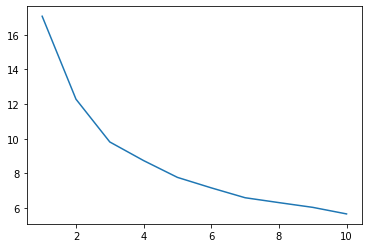

In [29]:
plt.plot(range(1,11), scores)#buscamos el "codo" mas agudo, seria en el 3(mirando el eje horizontal)

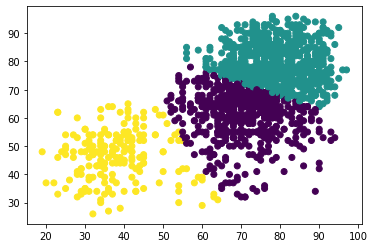

In [31]:
#clusterings[2] es el que queremos
plt.scatter(players['power_stamina'],players['movement_sprint_speed'], c = clusterings[2].labels_)

## Hierarchical clustering

In hierarchichal clustering there are groups within groups. We can either subdivide the observations (_divisive clustering_) or we join those that are similar to each other (_agglomerative clustering_).

We can track the order in which we join them up and represent it as a _dendrogram_.

We don't need to specify the number of clusters beforehand. 

The distance between two observations is the _height_ of the branching point that separates them.

<img src="https://i0.wp.com/datascienceplus.com/wp-content/uploads/2016/01/hclust.png" alt="Dendrogram" style="height: 600px; float: left;"/>


### Distance measures in clustering

In any of these approaches, we need a measure of distance or similarity between points. 

In hierarchical clustering, we additionally need a measure of similarity between single points and groups of points.

How will this measures be influenced by the scale of our variables?

In [32]:
X_1 = players['power_stamina']
X_2 = players['movement_sprint_speed']


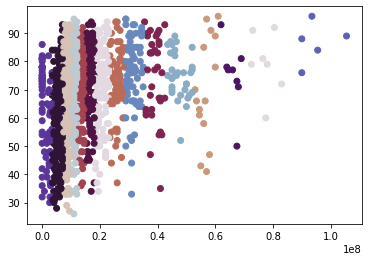

In [37]:
X_1 = players['value_eur'].fillna(0)
X_2 = players['movement_sprint_speed']

kmeans = KMeans(n_clusters=15)
kmeans.fit(players[['value_eur','movement_sprint_speed']])

plt.scatter(X_1, X_2,c=kmeans.labels_, cmap='twilight')

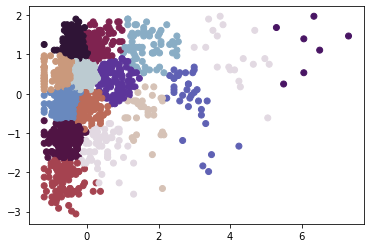

In [39]:
#deberiamos normalizar
from sklearn.preprocessing import StandardScaler
X_1 = players['value_eur'].fillna(0)
X_2 = players['movement_sprint_speed']

data = players[['value_eur','movement_sprint_speed']]
normalized = StandardScaler().fit_transform(data)

kmeans = KMeans(n_clusters=15)
kmeans.fit(normalized)

plt.scatter(normalized[:,0],normalized[:,1],c=kmeans.labels_, cmap='twilight')

### Clustering in scikit-learn

![Clustering algorithms in scikit-learn](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

## DBSCAN

There's also a hierarchical version.



## Measuring quality of clustering

### Elbow method

We've already seen it. Not very theoretically solid.

### Silhouette

The Silhouette Coefficient for a sample is a function of the mean intra-cluster distance (a) and the mean nearest cluster distance (b), and it is defined as:
 
$$ s(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}$$

It therefore varies between -1 for a sample that is closer to members of a different cluster than to its own and 1 for one that is a lot closer to members of its cluster.

It has a great advantage over the elbow method: it can either go up or down as we increase the number of clusters.

![2 clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)

![3 clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png)

![4 clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

![5 clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)

![6 clusters](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)


from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## Dimensionality reduction

### Principal Component Analysis (PCA)

A dimensionality reduction technique. It uses Singular Value Decomposition (SVD) of the data matrix to generate Principal Components: unit vectors that secuentially point in the direction that best fits the data, while being orthogonal to the previous ones.

They are ordered by the amount of variance they explain.

Those vectors can then be used to do a change of base. If we take fewer than the total, we will be doing _dimensionality reduction_; a proyection onto the subspace of the given dimension that conserves the most variance.

![PCA as base change](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

In three dimensions, but keeping only 2 components:

![PCA in 3D](figs/pca_3D.png)

from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

* Now let's apply PCA to our dataset.


# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[A comparison of classifiers available in scikit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[An amazing explanation of the kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Clustering in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

[Ensemble methods in scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

[An example of customer segmentation](https://www.kaggle.com/fabiendaniel/customer-segmentation)

[Hands-on ML](https://github.com/ageron/handson-ml2)

[Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

[PCA explained visually](https://setosa.io/ev/principal-component-analysis/)

[A step by step explanation of PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)